## I am using colab cloud environment, and google drive as my storage drive. To use the google drive as storage we need to install pydrive library.

## Installing pydrive library

In [0]:
# !pip install -U -q PyDrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [143]:
link = 'https://drive.google.com/open?id=1741_G49zJrVIjd_Zdgm4-R3P15a-sJcM' # Get shareble link of the csv file
fluff, id = link.split('=')
print(id)
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('bank_full.csv')

1741_G49zJrVIjd_Zdgm4-R3P15a-sJcM


## Importing all the required libraries

<b>We can import all the library with pyforest libraries with only two line command
  <ul>
    <li> >>!pip install pyforest   # Using this command We can install the pyforest library</li>
    <li> >>from pyforest import*   # To use all the library available in pyforest</li>
    <li> >>lazy_imports()          #It will return all the libraries available in pyforest.</li>
  </ul>
Note: I have imported the libraries manualy, thats why I have commented the line
</b>

In [0]:
# !pip install pyforest

In [0]:
# from pyforest import*

In [0]:
# lazy_imports()

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

## Reading the data as a data frame

In [148]:
df = pd.read_csv("bank_full.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Shape of the dataframe

In [149]:
df.shape

(45211, 17)

## Data type of each attribute

In [150]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

## Checking the presence of missing values

In [151]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [0]:
numeric_df = df.select_dtypes(exclude="object")
category_df = df.select_dtypes(exclude=np.number)

In [153]:
numeric_df.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [154]:
numeric_df.shape

(45211, 7)

In [155]:
category_df.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [156]:
category_df["marital/education"] = category_df["marital"]+" / "+category_df["education"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [157]:
category_df.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,Target,marital/education
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no,married / tertiary
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no,single / secondary
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no,married / secondary
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no,married / unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no,single / unknown


In [158]:
category_df.shape

(45211, 11)

## Summary of numerical attributes

In [159]:
numeric_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [160]:
numeric_df.loc[(numeric_df['pdays'] == -1),"previous"]

0        0
1        0
2        0
3        0
4        0
        ..
45203    0
45205    0
45206    0
45207    0
45209    0
Name: previous, Length: 36954, dtype: int64

## Insight of the data

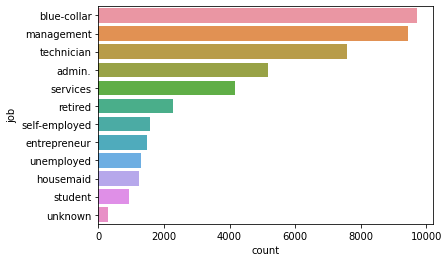

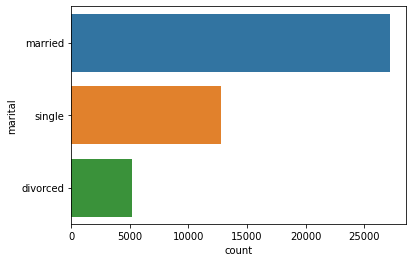

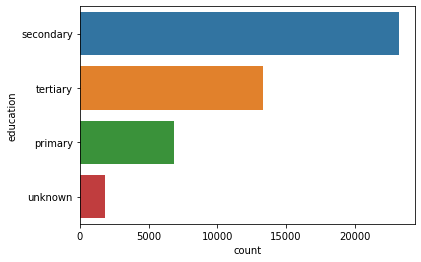

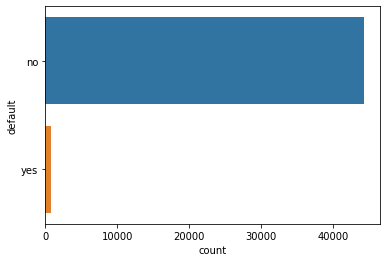

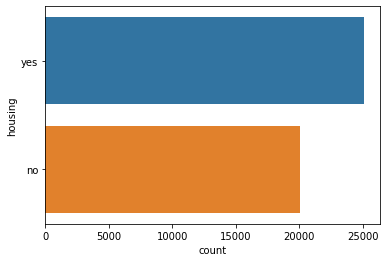

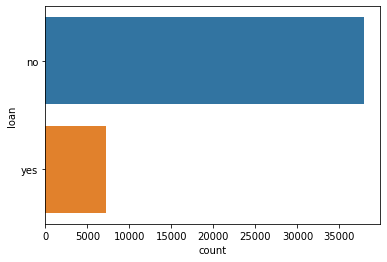

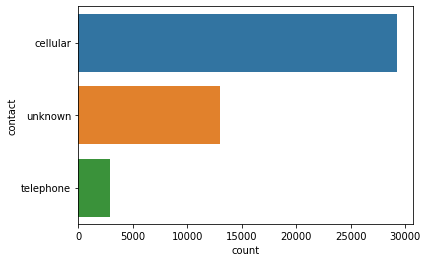

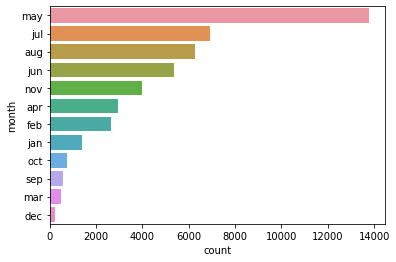

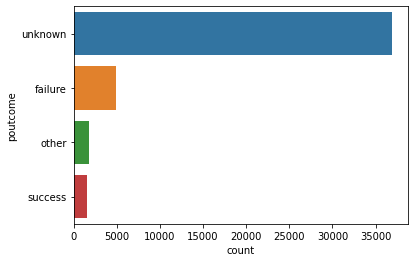

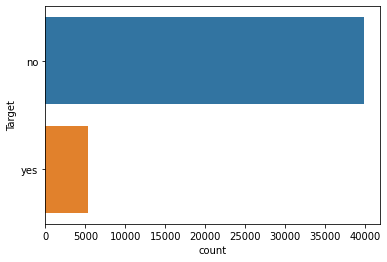

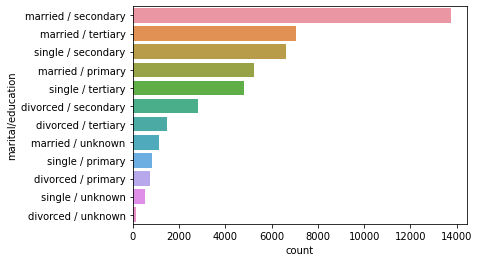

In [161]:
for col in category_df.columns:
  sns.countplot(y = col, data = category_df, order = category_df[col].value_counts().index)
  plt.show()

## Job Wise Deposit Term Subscription

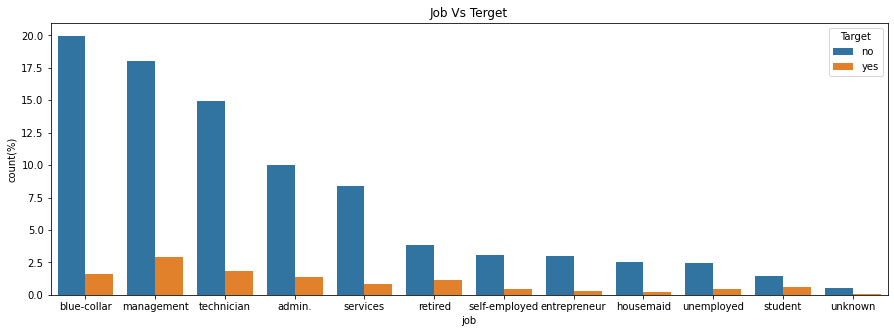

In [162]:
cate_job_target_list = []
for job in pd.unique(category_df["job"]):
  job_target = {}
  yes_no_count = category_df.loc[category_df["job"]==job,"Target"].value_counts()
  job_target["job"] = job
  job_target["Target"] = "no"
  job_target["count"] = yes_no_count[0]
  job_target["count(%)"] = yes_no_count[0]/len(category_df["job"])*100
  cate_job_target_list.append(job_target)
  job_target = {}
  job_target["job"] = job
  job_target["Target"] = "yes"
  job_target["count"] = yes_no_count[1]
  job_target["count(%)"] = yes_no_count[1]/len(category_df["job"])*100
  cate_job_target_list.append(job_target)
job_wise_target = pd.DataFrame(cate_job_target_list)
job_wise_target = job_wise_target.sort_values(['count'],ascending = False).reset_index(drop=True)
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(111)
sns.barplot(x="job", y="count(%)", hue="Target", data=job_wise_target)
plt.title("Job Vs Terget")
plt.show()

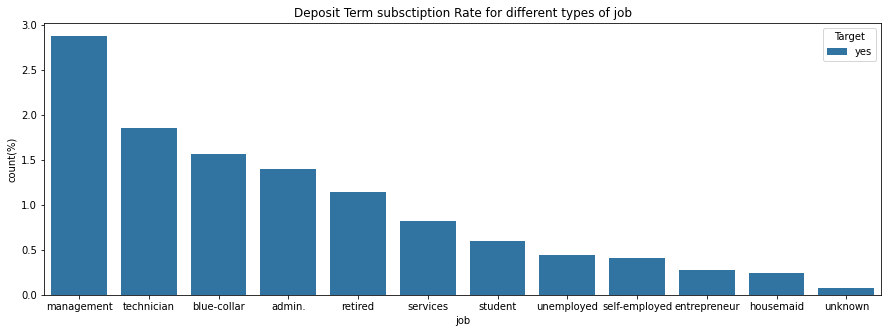

In [163]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(111)
sns.barplot(x="job", y="count(%)", hue="Target", data=job_wise_target[job_wise_target["Target"]=="yes"])
plt.title("Deposit Term subsctiption Rate for different types of job")
plt.show()

## Marital status and education wise Deposit Term Subscription

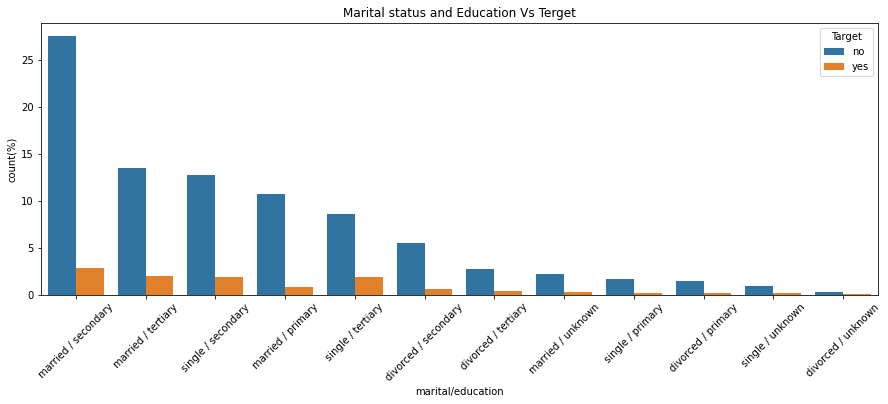

In [164]:
cate_marital_edu_target_list = []
for status in pd.unique(category_df["marital/education"]):
  marital_edu_target = {}
  yes_no_count = category_df.loc[category_df["marital/education"]==status,"Target"].value_counts()
  marital_edu_target["marital/education"] = status
  marital_edu_target["Target"] = "no"
  marital_edu_target["count"] = yes_no_count[0]
  marital_edu_target["count(%)"] = yes_no_count[0]/len(category_df["marital/education"])*100
  cate_marital_edu_target_list.append(marital_edu_target)
  marital_edu_target = {}
  marital_edu_target["marital/education"] = status
  marital_edu_target["Target"] = "yes"
  marital_edu_target["count"] = yes_no_count[1]
  marital_edu_target["count(%)"] = yes_no_count[1]/len(category_df["marital/education"])*100
  cate_marital_edu_target_list.append(marital_edu_target)
marital_edu_wise_target = pd.DataFrame(cate_marital_edu_target_list)
marital_edu_wise_target = marital_edu_wise_target.sort_values(['count'],ascending = False).reset_index(drop=True)
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(111)
sns.barplot(x="marital/education", y="count(%)", hue="Target", data=marital_edu_wise_target)
plt.xticks(rotation = 45)
plt.title("Marital status and Education Vs Terget")
plt.show()

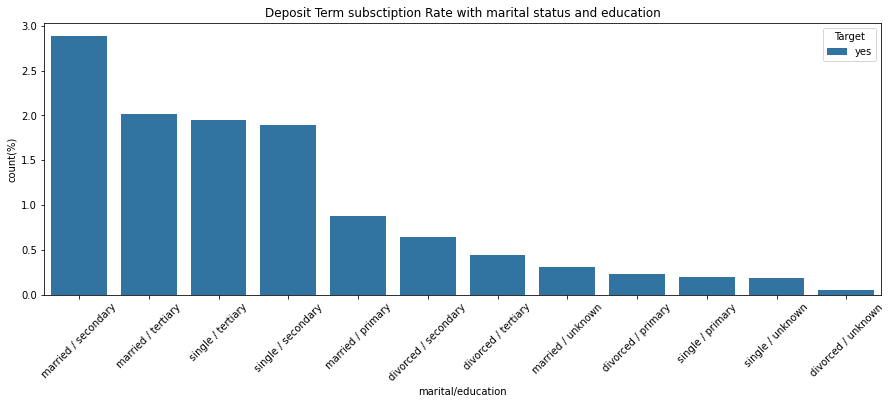

In [165]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(111)
sns.barplot(x="marital/education", y="count(%)", hue="Target", data=marital_edu_wise_target[marital_edu_wise_target["Target"]=="yes"])
plt.xticks(rotation = 45)
plt.title("Deposit Term subsctiption Rate with marital status and education")
plt.show()

## Month Wise Deposit Term Subscription

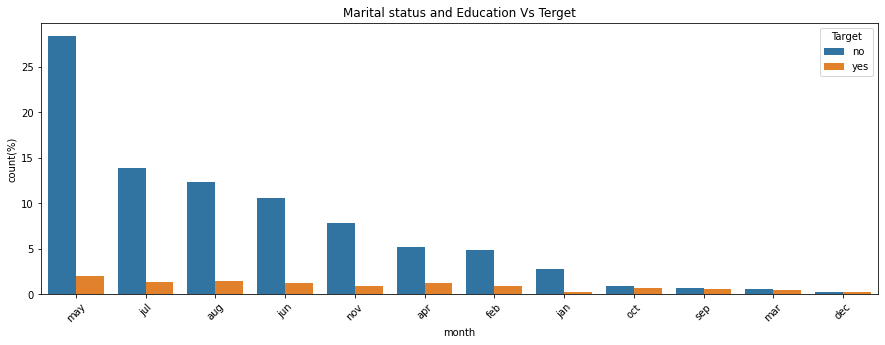

In [166]:
month_target_list = []
for month in pd.unique(category_df["month"]):
  month_target = {}
  yes_no_count = category_df.loc[category_df["month"]==month,"Target"].value_counts()
  month_target["month"] = month
  month_target["Target"] = "no"
  month_target["count"] = yes_no_count[0]
  month_target["count(%)"] = yes_no_count[0]/len(category_df["month"])*100
  month_target_list.append(month_target)
  month_target = {}
  month_target["month"] = month
  month_target["Target"] = "yes"
  month_target["count"] = yes_no_count[1]
  month_target["count(%)"] = yes_no_count[1]/len(category_df["month"])*100
  month_target_list.append(month_target)
month_wise_target = pd.DataFrame(month_target_list)
month_wise_target = month_wise_target.sort_values(['count'],ascending = False).reset_index(drop=True)
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(111)
sns.barplot(x="month", y="count(%)", hue="Target", data=month_wise_target)
plt.xticks(rotation = 45)
plt.title("Marital status and Education Vs Terget")
plt.show()

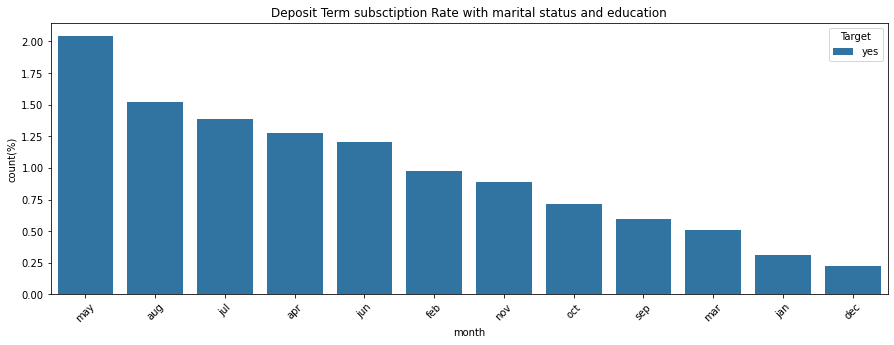

In [167]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(111)
sns.barplot(x="month", y="count(%)", hue="Target", data=month_wise_target[month_wise_target["Target"]=="yes"])
plt.xticks(rotation = 45)
plt.title("Deposit Term subsctiption Rate with marital status and education")
plt.show()

## Relation with Deposit Term Subscription and previous campaign result

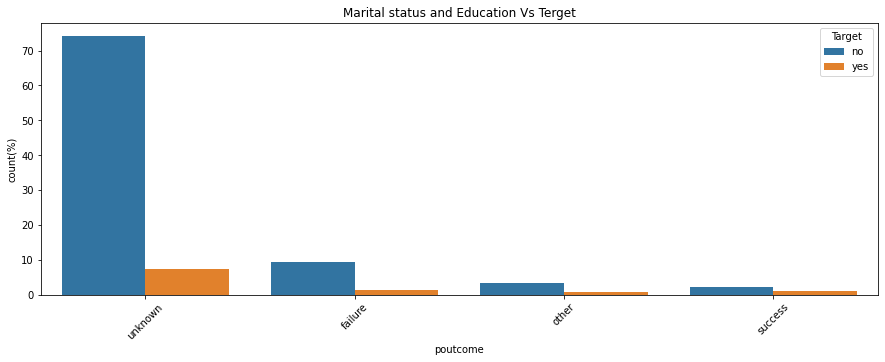

In [168]:
poutcome_target_list = []
for poutcome in pd.unique(category_df["poutcome"]):
  poutcome_target = {}
  yes_no_count = category_df.loc[category_df["poutcome"]==poutcome,"Target"].value_counts()
  poutcome_target["poutcome"] = poutcome
  poutcome_target["Target"] = "no"
  poutcome_target["count"] = yes_no_count[0]
  poutcome_target["count(%)"] = yes_no_count[0]/len(category_df["poutcome"])*100
  poutcome_target_list.append(poutcome_target)
  poutcome_target = {}
  poutcome_target["poutcome"] = poutcome
  poutcome_target["Target"] = "yes"
  poutcome_target["count"] = yes_no_count[1]
  poutcome_target["count(%)"] = yes_no_count[1]/len(category_df["poutcome"])*100
  poutcome_target_list.append(poutcome_target)
poutcome_wise_target = pd.DataFrame(poutcome_target_list)
poutcome_wise_target = poutcome_wise_target.sort_values(['count'],ascending = False).reset_index(drop=True)
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(111)
sns.barplot(x="poutcome", y="count(%)", hue="Target", data=poutcome_wise_target)
plt.xticks(rotation = 45)
plt.title("Marital status and Education Vs Terget")
plt.show()

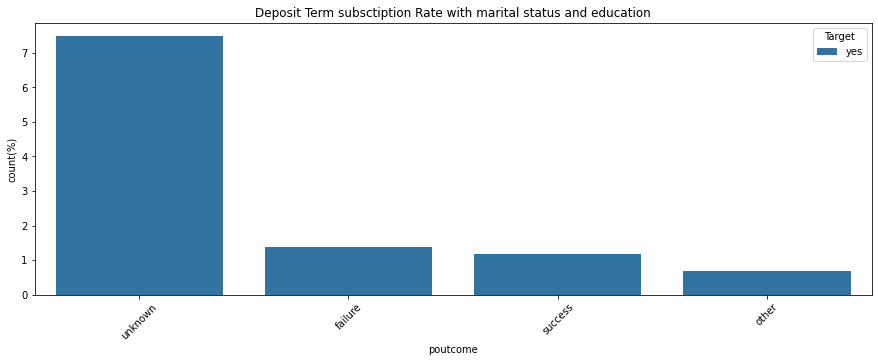

In [169]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(111)
sns.barplot(x="poutcome", y="count(%)", hue="Target", data=poutcome_wise_target[poutcome_wise_target["Target"]=="yes"])
plt.xticks(rotation = 45)
plt.title("Deposit Term subsctiption Rate with marital status and education")
plt.show()

## Data Cleaning

In [170]:
for col in category_df.columns[:-1]:
  print(category_df[col].value_counts())
  print("\n")

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


no     44396
yes      815
Name: default, dtype: int64


yes    25130
no     20081
Name: housing, dtype: int64


no     37967
yes     7244
Name: loan, dtype: int64


cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64


unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome

In the "education" column there is 1857 unknown  value is 
available, we can delete those rows however it will not effect our predective model because number of unknown value is small compeare to our dataset.

In [171]:
new_df = df[df["education"] != "unknown"]
new_df.shape

(43354, 17)

In the "contact" column there is 13020 unknown value is available, insted of deleting those unknown value we are going to categorize as "others".

In [172]:
new_df["contact"] = new_df["contact"].replace("unknown","other")
new_df["contact"].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


cellular     28295
other        12343
telephone     2716
Name: contact, dtype: int64

In the "poutcome" there is 36959 unknown value is available,this "poutcome" and "pdays" columns that define if a customer is new or existing, so we need to find is there any reletion between unknown value of "poutcome' and "pdays".

In [173]:
new_df.loc[(df["pdays"] == -1) & (new_df["poutcome"]=="unknown")].shape

(35420, 17)

Here we can see that "pdays" == -1 and "poutcome" == "unknown" is 36954, lets match it with "previous" attributs "0" value indicate new customers

In [174]:
new_df.previous.value_counts()[0]

35420

This is exactly same as "pdays" == -1 and "poutcome" == "unknown", so we can replace unknown value of poutcome with "nonexistent". It is also mention in the data description that 999 means client was not previously contacted in this dataset it is indicated by -1 so I am going to replace it by 999

In [175]:
new_df["poutcome"] = new_df["poutcome"].replace("unknown","nonexistent")
new_df["pdays"] = new_df["pdays"].replace(-1,999)
new_df.poutcome.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


nonexistent    35425
failure         4724
other           1775
success         1430
Name: poutcome, dtype: int64

In [176]:
new_df.shape

(43354, 17)

"other" value in "poutcome" is is less than 5%, we can drop it.

In [177]:
new_df = new_df[new_df["poutcome"]!="other"]
new_df.shape

(41579, 17)

In [0]:
new_df.drop("duration", axis=1,inplace =True)

In [179]:
new_df.describe()

,age,balance,day,campaign,pdays,previous
count,41579.000000,41579.000000,41579.000000,41579.000000,41579.000000,41579.000000
mean,40.832536,1349.621059,15.863681,2.773034,884.110104,0.436999
std,10.496525,3024.047256,8.307877,3.104747,278.947620,1.569066
min,18.000000,-8019.000000,1.000000,1.000000,1.000000,0.000000
25%,33.000000,69.000000,8.000000,1.000000,999.000000,0.000000
50%,39.000000,437.000000,16.000000,2.000000,999.000000,0.000000
75%,48.000000,1410.000000,21.000000,3.000000,999.000000,0.000000
max,95.000000,102127.000000,31.000000,58.000000,999.000000,55.000000


## Checking the presence of outliers

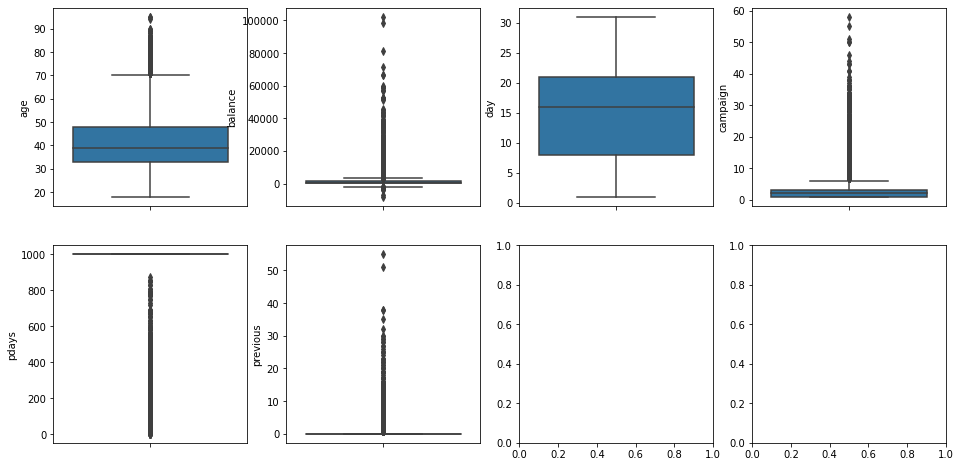

In [180]:
fig, ax2 = plt.subplots(2,4, figsize = (16,8))
sns.boxplot(new_df['age'], ax = ax2[0][0], orient="v")
sns.boxplot(new_df['balance'], ax = ax2[0][1], orient="v")
sns.boxplot(new_df['day'], ax = ax2[0][2], orient="v")
sns.boxplot(new_df['campaign'], ax = ax2[0][3], orient="v")
sns.boxplot(new_df['pdays'], ax = ax2[1][0], orient="v")
sns.boxplot(new_df['previous'], ax = ax2[1][1], orient="v")


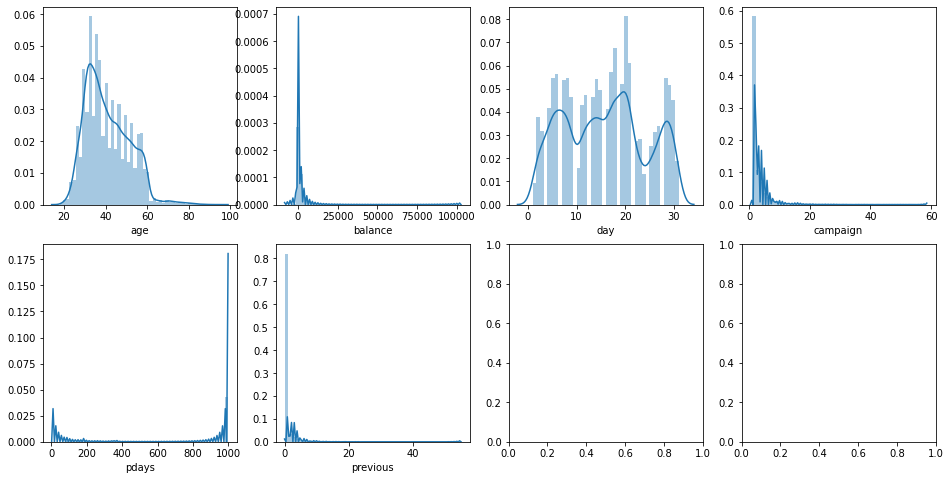

In [181]:
fig, ax2 = plt.subplots(2,4, figsize = (16,8))
sns.distplot(new_df['age'], ax = ax2[0][0])
sns.distplot(new_df['balance'], ax = ax2[0][1])
sns.distplot(new_df['day'], ax = ax2[0][2])
sns.distplot(new_df['campaign'], ax = ax2[0][3])
sns.distplot(new_df['pdays'], ax = ax2[1][0])
sns.distplot(new_df['previous'], ax = ax2[1][1])
plt.show()


##### Outliers Min and Max Range

<h5>Finding the Quantile range</h5>
quantile_value = {key:[q1,13]};
q1 = 1st quantile
q3 = 3rd quantile

In [182]:
quantile_value = {}
q_value = [0.25, 0.75]
for col in new_df.select_dtypes(exclude="object").columns:
    q_list = []
    for q in q_value:
        q_list.append(new_df[col].quantile(q))
        quantile_value["q_"+col] = q_list
quantile_value

{'q_age': [33.0, 48.0],
 'q_balance': [69.0, 1410.0],
 'q_campaign': [1.0, 3.0],
 'q_day': [8.0, 21.0],
 'q_pdays': [999.0, 999.0],
 'q_previous': [0.0, 0.0]}

In [183]:
new_df.select_dtypes(exclude="object").columns

Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous'], dtype='object')

In [184]:
outliers = {}
for i in quantile_value:
  list_outlier = []
  list_outlier.append(quantile_value.get(i)[0]-1.5*(quantile_value.get(i)[1]-quantile_value.get(i)[0]))
  list_outlier.append(quantile_value.get(i)[1]+1.5*(quantile_value.get(i)[1]-quantile_value.get(i)[0]))
  dic_key = i +'_outliers'
  outliers[dic_key] = list_outlier
outliers

{'q_age_outliers': [10.5, 70.5],
 'q_balance_outliers': [-1942.5, 3421.5],
 'q_campaign_outliers': [-2.0, 6.0],
 'q_day_outliers': [-11.5, 40.5],
 'q_pdays_outliers': [999.0, 999.0],
 'q_previous_outliers': [0.0, 0.0]}

##### Number Of Outliers Available in Numaric attributes

In [185]:
for col in new_df.select_dtypes(exclude="object").columns:
  outlier_key = "q_"+col+"_outliers"
  #query_df = col+" > "+str(outliers[outlier_key][0])+" and "+" < "+str(outliers[outlier_key][1])
  #number_of_outliers = 
  print("Number of outliers for {} is :{}".format(col,
                                                  len(new_df[col])-len(new_df.loc[(new_df[col]>outliers[outlier_key][0]) & (new_df[col]<outliers[outlier_key][1])])))

Number of outliers for age is :403
Number of outliers for balance is :4371
Number of outliers for day is :0
Number of outliers for campaign is :4021
Number of outliers for pdays is :41579
Number of outliers for previous is :41579


In [186]:
new_df.select_dtypes(exclude="object").columns

Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous'], dtype='object')

In [0]:
for cols in ["age","balance","campaign"]:
  q1 = new_df[cols].quantile(0.25)
  q3 = new_df[cols].quantile(0.75)
  iqr = q3-q1
  low_outlier = q1-1.5*iqr
  high_outlier = q3+1.5*iqr
  new_df.loc[(new_df[cols] < low_outlier) | (new_df[cols] > high_outlier ), cols] = new_df[cols].median()

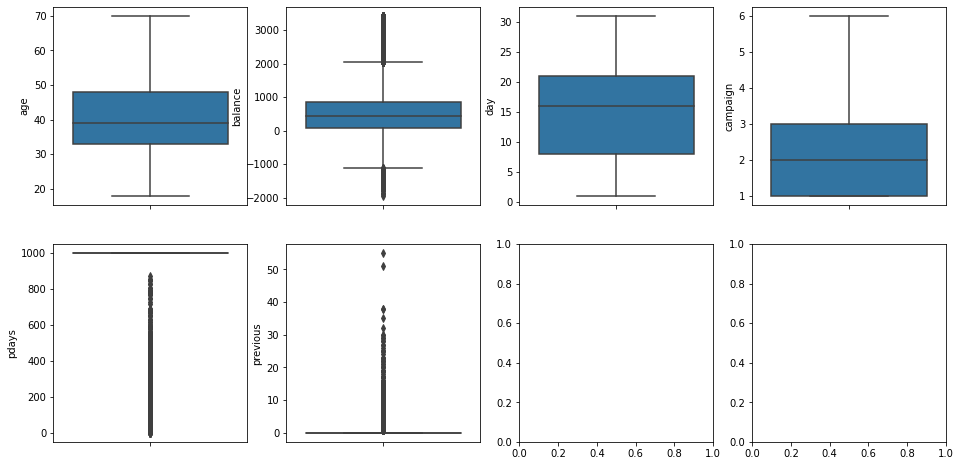

In [188]:
fig, ax2 = plt.subplots(2,4, figsize = (16,8))
sns.boxplot(new_df['age'], ax = ax2[0][0], orient="v")
sns.boxplot(new_df['balance'], ax = ax2[0][1], orient="v")
sns.boxplot(new_df['day'], ax = ax2[0][2], orient="v")
sns.boxplot(new_df['campaign'], ax = ax2[0][3], orient="v")
sns.boxplot(new_df['pdays'], ax = ax2[1][0], orient="v")
sns.boxplot(new_df['previous'], ax = ax2[1][1], orient="v")

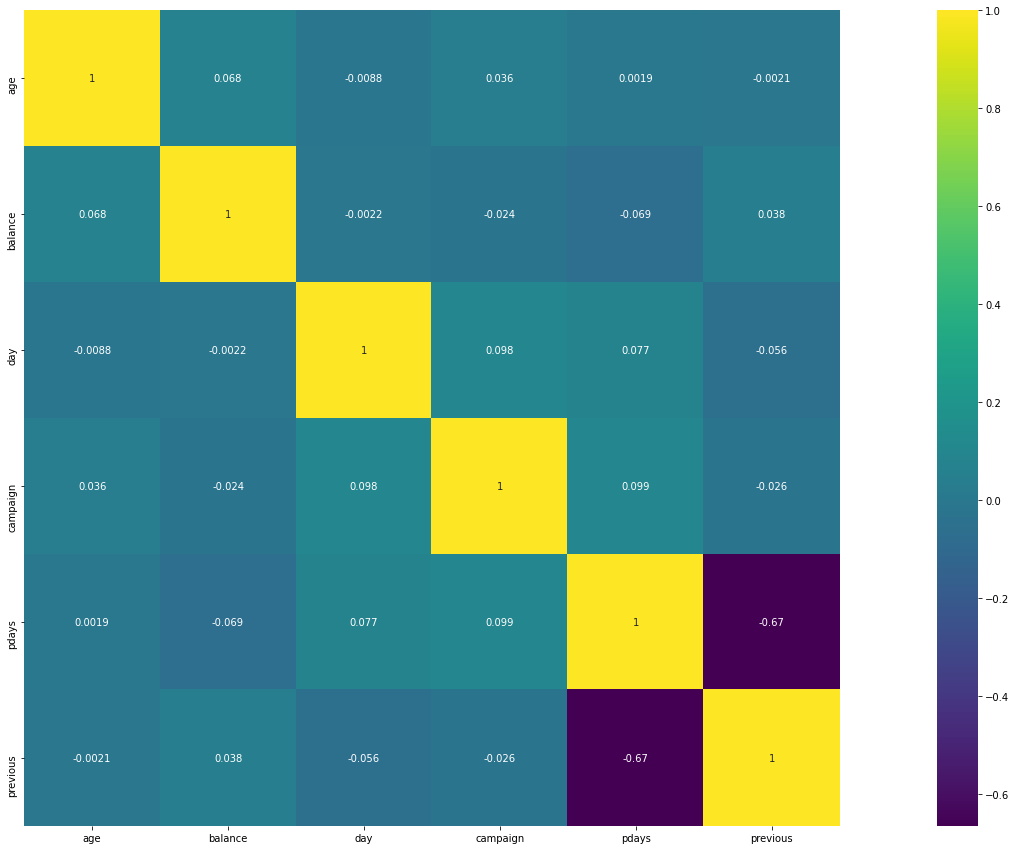

In [189]:
f = plt.figure(figsize=(35,15))
ax = f.add_subplot(111)
sns.heatmap(new_df.corr(),  vmax=1, square=True, annot=True,cmap='viridis')
plt.show()

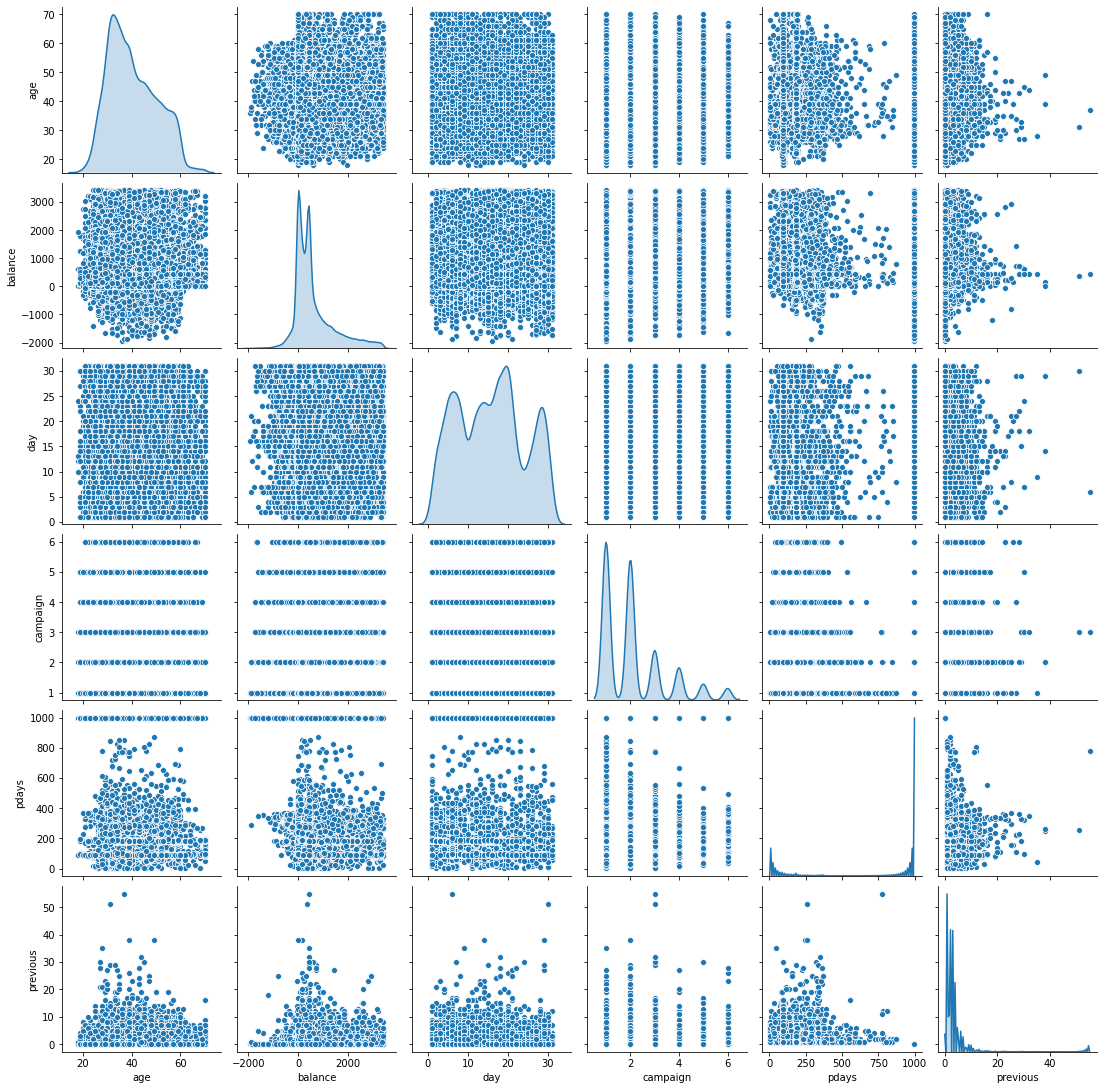

In [190]:
sns.pairplot(new_df,diag_kind='kde')

## Model Bulding

In [0]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [0]:
new_df.reset_index(drop=True, inplace = True)

In [193]:
numeric_df = new_df.select_dtypes(exclude="object")
category_df = new_df.select_dtypes(exclude=np.number)
numeric_df

,age,balance,day,campaign,pdays,previous
0,58.0,2143.0,5,1.0,999,0
1,44.0,29.0,5,1.0,999,0
2,33.0,2.0,5,1.0,999,0
3,35.0,231.0,5,1.0,999,0
4,28.0,447.0,5,1.0,999,0
...,...,...,...,...,...,...
41574,25.0,505.0,17,2.0,999,0
41575,51.0,825.0,17,3.0,999,0
41576,39.0,1729.0,17,2.0,999,0
41577,39.0,437.0,17,5.0,184,3


In [194]:
category_df

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,management,married,tertiary,no,yes,no,other,may,nonexistent,no
1,technician,single,secondary,no,yes,no,other,may,nonexistent,no
2,entrepreneur,married,secondary,no,yes,yes,other,may,nonexistent,no
3,management,married,tertiary,no,yes,no,other,may,nonexistent,no
4,management,single,tertiary,no,yes,yes,other,may,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...
41574,technician,single,secondary,no,no,yes,cellular,nov,nonexistent,yes
41575,technician,married,tertiary,no,no,no,cellular,nov,nonexistent,yes
41576,retired,divorced,primary,no,no,no,cellular,nov,nonexistent,yes
41577,retired,married,secondary,no,no,no,cellular,nov,success,yes


In [0]:
numeric_col = numeric_df.columns

In [196]:
scaler =  MinMaxScaler()
scaler.fit(numeric_df)
numeric_df = scaler.transform(numeric_df)
numeric_scl_df = pd.DataFrame(numeric_df, columns=numeric_col)
numeric_scl_df

,age,balance,day,campaign,pdays,previous
0,0.769231,0.761656,0.133333,0.0,1.000000,0.000000
1,0.500000,0.367400,0.133333,0.0,1.000000,0.000000
2,0.288462,0.362365,0.133333,0.0,1.000000,0.000000
3,0.326923,0.405073,0.133333,0.0,1.000000,0.000000
4,0.192308,0.445356,0.133333,0.0,1.000000,0.000000
...,...,...,...,...,...,...
41574,0.134615,0.456173,0.533333,0.2,1.000000,0.000000
41575,0.634615,0.515852,0.533333,0.4,1.000000,0.000000
41576,0.403846,0.684446,0.533333,0.2,1.000000,0.000000
41577,0.403846,0.443491,0.533333,0.8,0.183367,0.054545


In [0]:
from collections import defaultdict
d = defaultdict(LabelEncoder)

In [0]:
category_enc_df = category_df.apply(lambda x: d[x.name].fit_transform(x))
# Inverse the encoded
#fit.apply(lambda x: d[x.name].inverse_transform(x))

# Using the dictionary to label future data
#df.apply(lambda x: d[x.name].transform(x))

In [199]:
category_enc_df

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,4,1,2,0,1,0,1,8,1,0
1,9,2,1,0,1,0,1,8,1,0
2,2,1,1,0,1,1,1,8,1,0
3,4,1,2,0,1,0,1,8,1,0
4,4,2,2,0,1,1,1,8,1,0
...,...,...,...,...,...,...,...,...,...,...
41574,9,2,1,0,0,1,0,9,1,1
41575,9,1,2,0,0,0,0,9,1,1
41576,5,0,0,0,0,0,0,9,1,1
41577,5,1,1,0,0,0,0,9,2,1


In [200]:
new_scl_enc_df = pd.concat([numeric_scl_df, category_enc_df],axis=1)
new_scl_enc_df

,age,balance,day,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,0.769231,0.761656,0.133333,0.0,1.000000,0.000000,4,1,2,0,1,0,1,8,1,0
1,0.500000,0.367400,0.133333,0.0,1.000000,0.000000,9,2,1,0,1,0,1,8,1,0
2,0.288462,0.362365,0.133333,0.0,1.000000,0.000000,2,1,1,0,1,1,1,8,1,0
3,0.326923,0.405073,0.133333,0.0,1.000000,0.000000,4,1,2,0,1,0,1,8,1,0
4,0.192308,0.445356,0.133333,0.0,1.000000,0.000000,4,2,2,0,1,1,1,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41574,0.134615,0.456173,0.533333,0.2,1.000000,0.000000,9,2,1,0,0,1,0,9,1,1
41575,0.634615,0.515852,0.533333,0.4,1.000000,0.000000,9,1,2,0,0,0,0,9,1,1
41576,0.403846,0.684446,0.533333,0.2,1.000000,0.000000,5,0,0,0,0,0,0,9,1,1
41577,0.403846,0.443491,0.533333,0.8,0.183367,0.054545,5,1,1,0,0,0,0,9,2,1


In [0]:
x = new_scl_enc_df.drop("Target", axis =1)
y = new_scl_enc_df["Target"]

In [202]:
new_scl_enc_df.columns

Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'job',
       'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'Target'],
      dtype='object')

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

## SVC

In [0]:
from sklearn.svm import SVC

In [0]:
model_svc = SVC(gamma=0.025, C=3)

In [207]:
model_svc.fit(x_train,y_train)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_prd_svc = model_svc.predict(x_test)

In [209]:
train_score = model_svc.score(x_train,y_train)
train_score

0.8965071615751876

In [210]:
test_score = model_svc.score(x_test,y_test)
test_score

0.894767526599621

In [211]:
print('SVC classification_report')

print('...'*10)

print(classification_report(y_test,y_prd_svc))

SVC classification_report
..............................
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     12144
           1       0.65      0.19      0.29      1578

    accuracy                           0.89     13722
   macro avg       0.78      0.59      0.62     13722
weighted avg       0.87      0.89      0.87     13722



SVC confusion matrix


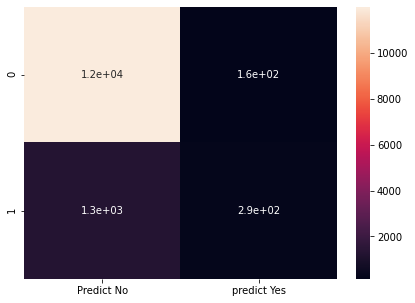

In [212]:
print('SVC confusion matrix')

cm=confusion_matrix(y_test,y_prd_svc, labels=[0,1])

df_cm=pd.DataFrame(cm, index=[i for i in [0,1]],columns=[i for i in ['Predict No','predict Yes']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True)
plt.show()

In [213]:
save_result = {"Model":["SVC"], 
               "Train_score": train_score,
               "Test_score": test_score,
               }
model_svc_df = pd.DataFrame(save_result)
#result_df = pd.concat([model_linear_df,model_randomforest_df])
#result_df
model_svc_df

,Model,Train_score,Test_score
0,SVC,0.896507,0.894768


In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
model_KNN=KNeighborsClassifier(n_neighbors=7, weights='distance')

In [216]:
model_KNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='distance')

In [0]:
y_prd_knn = model_KNN.predict(x_test)

In [218]:
train_score = model_KNN.score(x_train, y_train)
train_score

0.9999282047600244

In [219]:
test_score = model_KNN.score(x_test, y_test)
test_score

0.889811980760822

In [220]:
print('KNN classification_report')

print('...'*10)

print(classification_report(y_test,y_prd_knn))

KNN classification_report
..............................
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12144
           1       0.55      0.22      0.31      1578

    accuracy                           0.89     13722
   macro avg       0.73      0.60      0.63     13722
weighted avg       0.87      0.89      0.87     13722



In [221]:
save_result = {"Model":["KNN"], 
               "Train_score": train_score,
               "Test_score": test_score,
               }
model_knn_df = pd.DataFrame(save_result)
result_df = pd.concat([model_svc_df,model_knn_df])
result_df

,Model,Train_score,Test_score
0,SVC,0.896507,0.894768
0,KNN,0.999928,0.889812


KNN confusion matrix


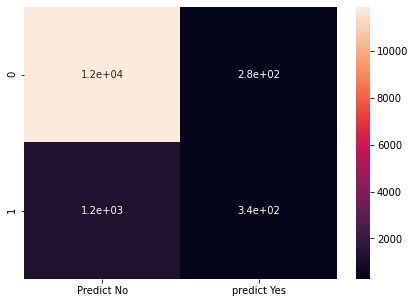

In [222]:
print('KNN confusion matrix')

cm=confusion_matrix(y_test,y_prd_knn, labels=[0,1])

df_cm=pd.DataFrame(cm, index=[i for i in [0,1]],columns=[i for i in ['Predict No','predict Yes']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True)
plt.show()

In [223]:
svc_prd = pd.DataFrame(y_prd_knn, columns=["svc_prd"])
knn_prd = pd.DataFrame(y_prd_svc, columns=["knn_prd"])
y_svc_knn = pd.concat([svc_prd, knn_prd], axis = 1)
y_svc_knn

,svc_prd,knn_prd
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
13717,0,0
13718,0,0
13719,0,0
13720,0,0


In [224]:
y_svc_knn[y_svc_knn["svc_prd"] != y_svc_knn["knn_prd"]]

,svc_prd,knn_prd
24,1,0
111,0,1
125,1,0
126,0,1
135,1,0
...,...,...
13591,0,1
13605,1,0
13606,1,0
13662,1,0


## Decision Tree Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
tree = DecisionTreeClassifier(max_depth = 4,random_state=1,min_samples_leaf=5)

In [227]:
tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [0]:
y_prd_tree = tree.predict(x_test)

In [229]:
train_score = tree.score(x_train, y_train)
train_score

0.8979789639946871

In [230]:
test_score = tree.score(x_test,y_test)
test_score

0.8944760239032211

In [231]:
print('DecisionTree classification_report')

print('...'*10)

print(classification_report(y_test,y_prd_tree))

DecisionTree classification_report
..............................
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     12144
           1       0.65      0.18      0.28      1578

    accuracy                           0.89     13722
   macro avg       0.78      0.58      0.61     13722
weighted avg       0.87      0.89      0.87     13722



In [232]:
save_result = {"Model":["DecisionTree"], 
               "Train_score": train_score,
               "Test_score": test_score,
               }
model_tree_df = pd.DataFrame(save_result)
result_df = pd.concat([result_df,model_tree_df])
result_df

,Model,Train_score,Test_score
0,SVC,0.896507,0.894768
0,KNN,0.999928,0.889812
0,DecisionTree,0.897979,0.894476


DecisionTreeClassifier confusion matrix


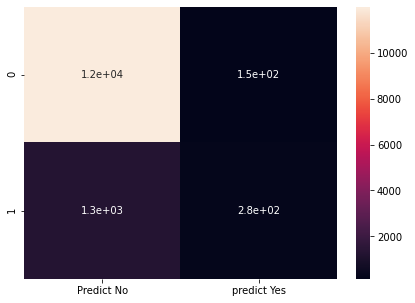

In [233]:
print('DecisionTreeClassifier confusion matrix')

cm=confusion_matrix(y_test,y_prd_tree, labels=[0,1])

df_cm=pd.DataFrame(cm, index=[i for i in [0,1]],columns=[i for i in ['Predict No','predict Yes']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True)
plt.show()

## Gradient Boost Classifier

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
model_gradient = GradientBoostingClassifier()

In [236]:
model_gradient.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
y_prd_gradient = model_gradient.predict(x_test)

In [238]:
train_score = model_gradient.score(x_train,y_train)
train_score

0.9014251355135154

In [239]:
test_score = model_gradient.score(x_test,y_test)
test_score

0.8971724238449206

In [240]:
print('Gradient Boost classification_report')

print('...'*10)

print(classification_report(y_test,y_prd_gradient))

Gradient Boost classification_report
..............................
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     12144
           1       0.69      0.19      0.30      1578

    accuracy                           0.90     13722
   macro avg       0.80      0.59      0.62     13722
weighted avg       0.88      0.90      0.87     13722



In [241]:
save_result = {"Model":["GradientBoosting"], 
               "Train_score": train_score,
               "Test_score": test_score,
               }
model_gradient_df = pd.DataFrame(save_result)
result_df = pd.concat([result_df, model_gradient_df])
result_df

,Model,Train_score,Test_score
0,SVC,0.896507,0.894768
0,KNN,0.999928,0.889812
0,DecisionTree,0.897979,0.894476
0,GradientBoosting,0.901425,0.897172


GradientBoosting Classifier confusion matrix


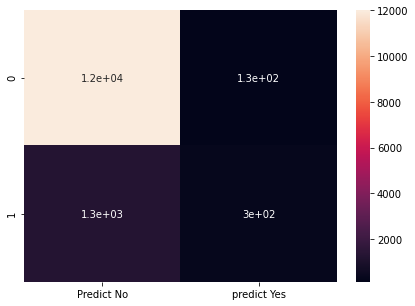

In [242]:
print('GradientBoosting Classifier confusion matrix')

cm=confusion_matrix(y_test,y_prd_gradient, labels=[0,1])

df_cm=pd.DataFrame(cm, index=[i for i in [0,1]],columns=[i for i in ['Predict No','predict Yes']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True)
plt.show()

## Ada Boosting Classifier

In [0]:
from sklearn.ensemble import AdaBoostClassifier

In [0]:
model_ada = AdaBoostClassifier()

In [245]:
model_ada.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [0]:
y_prd_ada = model_ada.predict(x_test)

In [247]:
train_score = model_ada.score(x_train, y_train)
train_score

0.8951789496356392

In [248]:
test_score = model_ada.score(x_test, y_test)
test_score

0.8941845212068211

In [249]:
metrics.mean_squared_error(y_test, y_prd_ada)

0.10581547879317883

In [250]:
print('AdaBoost classification_report')

print('...'*10)

print(classification_report(y_test,y_prd_ada))

AdaBoost classification_report
..............................
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     12144
           1       0.66      0.16      0.26      1578

    accuracy                           0.89     13722
   macro avg       0.78      0.58      0.60     13722
weighted avg       0.87      0.89      0.86     13722



In [251]:
save_result = {"Model":["AdaBoostClassifier"], 
               "Train_score": train_score,
               "Test_score": test_score,
               }
model_ada_df = pd.DataFrame(save_result)
result_df = pd.concat([result_df, model_ada_df])
result_df

,Model,Train_score,Test_score
0,SVC,0.896507,0.894768
0,KNN,0.999928,0.889812
0,DecisionTree,0.897979,0.894476
0,GradientBoosting,0.901425,0.897172
0,AdaBoostClassifier,0.895179,0.894185


AdaBoost Classifier confusion matrix


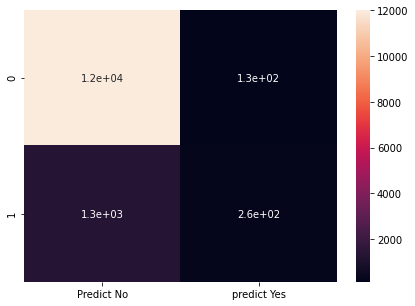

In [252]:
print('AdaBoost Classifier confusion matrix')

cm=confusion_matrix(y_test,y_prd_ada, labels=[0,1])

df_cm=pd.DataFrame(cm, index=[i for i in [0,1]],columns=[i for i in ['Predict No','predict Yes']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True)
plt.show()

## Bagging Classifier

In [0]:
from sklearn.ensemble import BaggingClassifier

In [0]:
model_bagging = BaggingClassifier()

In [255]:
model_bagging.fit(x_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [0]:
y_prd_bagging = model_bagging.predict(x_test)

In [257]:
train_score = model_bagging.score(x_train, y_train)
train_score

0.986538392504577

In [258]:
test_score = model_bagging.score(x_test, y_test)
test_score

0.8874070835155226

In [259]:
print('XGBoost classification_report')

print('...'*10)

print(classification_report(y_test,y_prd_bagging))

XGBoost classification_report
..............................
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     12144
           1       0.53      0.20      0.29      1578

    accuracy                           0.89     13722
   macro avg       0.72      0.59      0.62     13722
weighted avg       0.86      0.89      0.86     13722



In [260]:
save_result = {"Model":["BaggingClassifier"], 
               "Train_score": train_score,
               "Test_score": test_score,
               }
model_bagging_df = pd.DataFrame(save_result)
result_df = pd.concat([result_df, model_bagging_df])
result_df

,Model,Train_score,Test_score
0,SVC,0.896507,0.894768
0,KNN,0.999928,0.889812
0,DecisionTree,0.897979,0.894476
0,GradientBoosting,0.901425,0.897172
0,AdaBoostClassifier,0.895179,0.894185
0,BaggingClassifier,0.986538,0.887407


AdaBoost Classifier confusion matrix


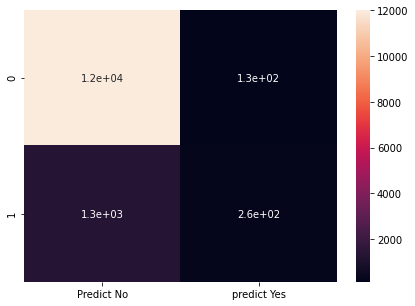

In [261]:
print('AdaBoost Classifier confusion matrix')

cm=confusion_matrix(y_test,y_prd_ada, labels=[0,1])

df_cm=pd.DataFrame(cm, index=[i for i in [0,1]],columns=[i for i in ['Predict No','predict Yes']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True)
plt.show()

Bagging Classifier confusion matrix


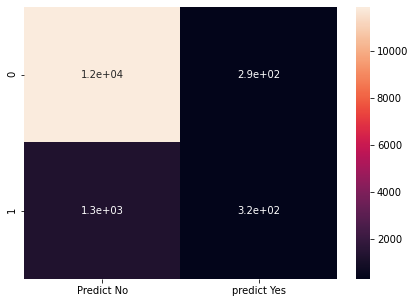

In [262]:
print('Bagging Classifier confusion matrix')

cm=confusion_matrix(y_test,y_prd_bagging, labels=[0,1])

df_cm=pd.DataFrame(cm, index=[i for i in [0,1]],columns=[i for i in ['Predict No','predict Yes']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True)
plt.show()

## XGBoost Classifier

In [0]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [0]:
model_xgb = XGBClassifier()

In [265]:
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_prd_xgb = model_xgb.predict(x_test)

In [267]:
train_score = model_xgb.score(x_train, y_train)
train_score

0.9004917973938328

In [268]:
test_score = model_xgb.score(x_test, y_test)
test_score

0.8974639265413205

In [269]:
save_result = {"Model":["XGBoost"], 
               "Train_score": train_score,
               "Test_score": test_score,
               }
model_xgb_df = pd.DataFrame(save_result)
result_df = pd.concat([result_df, model_xgb_df])
result_df

,Model,Train_score,Test_score
0,SVC,0.896507,0.894768
0,KNN,0.999928,0.889812
0,DecisionTree,0.897979,0.894476
0,GradientBoosting,0.901425,0.897172
0,AdaBoostClassifier,0.895179,0.894185
0,BaggingClassifier,0.986538,0.887407
0,XGBoost,0.900492,0.897464


XGBoost Classifier confusion matrix


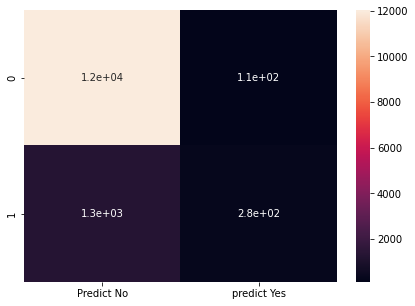

In [270]:
print('XGBoost Classifier confusion matrix')

cm=confusion_matrix(y_test,y_prd_xgb, labels=[0,1])

df_cm=pd.DataFrame(cm, index=[i for i in [0,1]],columns=[i for i in ['Predict No','predict Yes']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True)
plt.show()